In [ ]:
                                #Day 1: Setup and Data Loading

In [2]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
print("First 5 rows\n",df.head())
print("Shape of data\n",df.shape)
print("Describe of data\n",df.describe())
print("Information of data\n",df.info())

First 5 rows
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Shape of data
 (200, 5)
Describe of data
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000


In [4]:
                                #Day 2: Exploratory Data Analysis

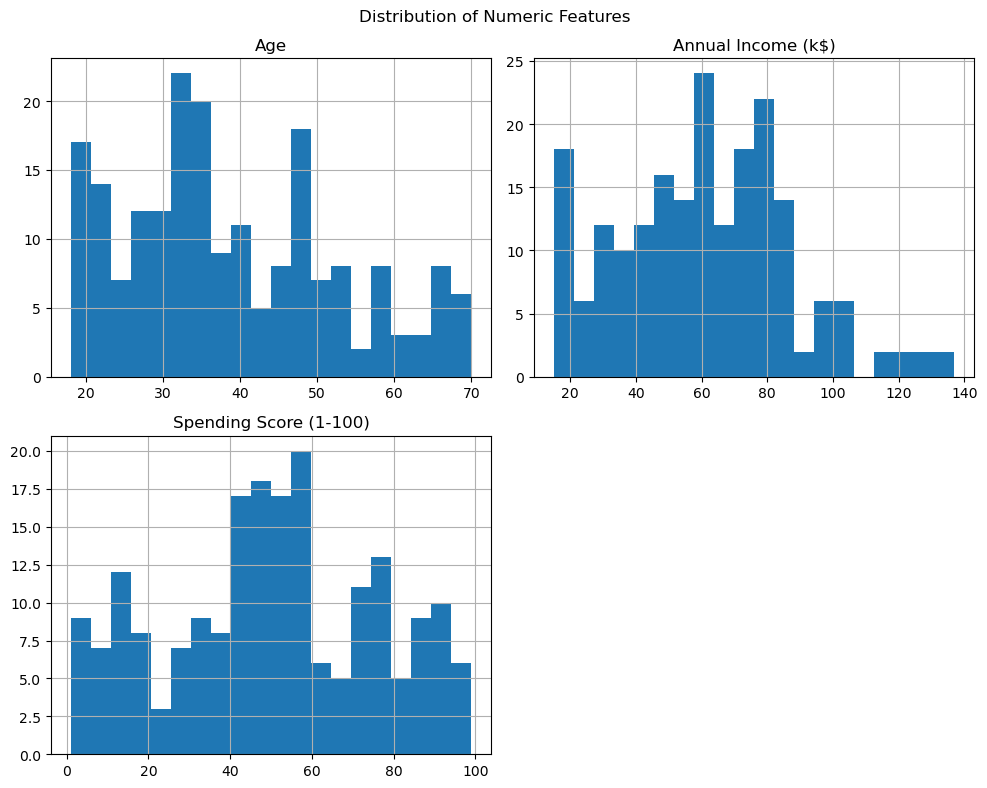

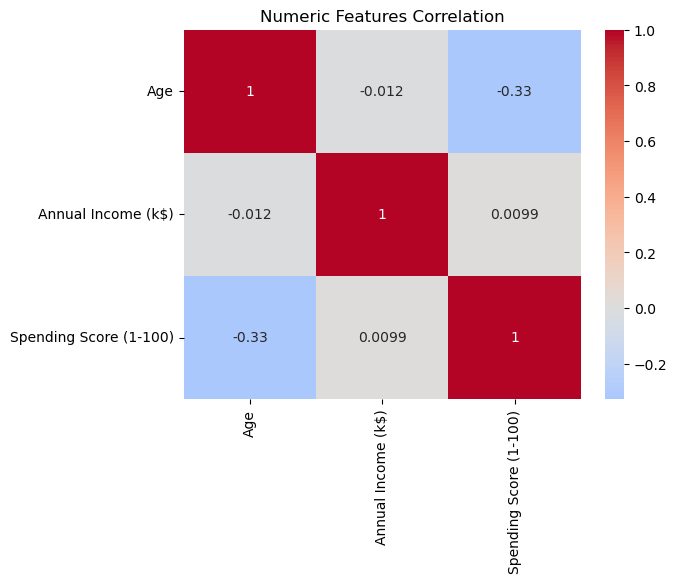

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Duplicates: 0
Data types:
 CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
    #Histograms for Distributions
numeric_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df[numeric_cols].hist(bins=20, figsize=(10, 8), layout=(2, 2))
plt.suptitle('Distribution of Numeric Features')
plt.tight_layout()
plt.show()
    #Correlation Heatmap
corr = df.drop('CustomerID',axis=1).select_dtypes(include='number').corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',center=0)
plt.title('Numeric Features Correlation')
plt.show()
    #Check Missing Values
print("Missing values:\n", df.isnull().sum())  # All 0s
print("Duplicates:", df.duplicated().sum())    # 0
print("Data types:\n", df.dtypes)


In [10]:
                                #Day 3: Data Preparation

In [18]:
import numpy as np
    #Select Features
        #Focus on spending and frequency proxies:
features = ['Annual Income (k$)','Spending Score (1-100)']
x = df[features].values
print(x[:5])
    #Scale Features
        #K-Means uses Euclidean distance, so standardize:
# Step 1: Select features (spending & frequency proxies)
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].values  # Convert to numpy array
print("X shape:", X.shape)  # (200, 2)
print("X sample:\n", X[:3])

# Step 2: Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("X_scaled sample:\n", X_scaled[:5])
print("Scaled mean:", X_scaled.mean(axis=0))  # ~[0, 0]
print("Scaled std:", X_scaled.std(axis=0))     # ~[1, 1]

    #Verify Preparation
# 1. Features
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].values

# 2. Scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Verify (correct capitalization!)
print("Original range - Income:", X[:,0].min(), "to", X[:,0].max())
print("Scaled range - Income:", X_scaled[:,0].min(), "to", X_scaled[:,0].max())


[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]
X shape: (200, 2)
X sample:
 [[15 39]
 [15 81]
 [16  6]]
X_scaled sample:
 [[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]
Scaled mean: [-2.13162821e-16 -1.46549439e-16]
Scaled std: [1. 1.]
Original range - Income: 15 to 137
Scaled range - Income: -1.7389991930659485 to 2.9176711658902788


In [ ]:
                                #Day 4: Optimal Clusters    

C:\Users\91833\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\91833\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91833\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\91833\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

WCSS (Inertia) for K=1 to 10:
K=1: 400.00
K=2: 269.69
K=3: 157.70
K=4: 108.92
K=5: 65.57
K=6: 55.06
K=7: 44.86
K=8: 37.23
K=9: 32.39
K=10: 29.98


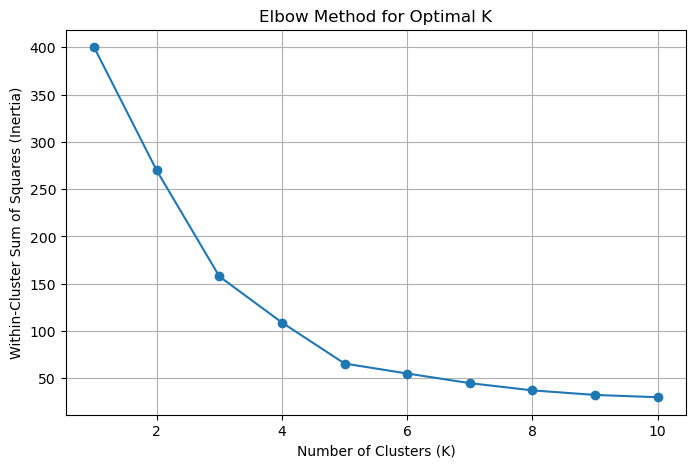

In [5]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
# Day 3: Data Preparation (re-run this first)
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].values  # This creates X

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # This creates X_scaled

# Compute Inertia for K=1 to 10
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

K_range = range(1, 11)
inertias = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

print("WCSS (Inertia) for K=1 to 10:")
for k, inertia in zip(K_range, inertias):
    print(f"K={k}: {inertia:.2f}")

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.grid(True)
plt.show()

In [6]:
                            #Day 5: Apply K-Means and Analyze

In [7]:
    #Fit K-Means with Optimal K
# Create KMeans with optimal K (e.g., 5 from elbow)
kmeans_opt = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans_opt.fit_predict(X_scaled)
# Add cluster to original DataFrame
df['Cluster'] = cluster_labels
print(df.head())
    #Analyze Segments
# Cluster-wise summary (spending, frequency)
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].agg(['mean', 'count'])
print(cluster_summary)

C:\Users\91833\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\91833\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  
        Annual Income (k$)       Spending Score (1-100)      
                      mean count                   mean count
Cluster                                                      
0                55.296296    81              49.518519    81
1                86.538462    39              82.128205    39
2                25.727273    22              79.363636    22
3                88.200000    35              17.114286    35
4                26.304348    23           

In [8]:
                        #Day 6: Visualize and Interpret

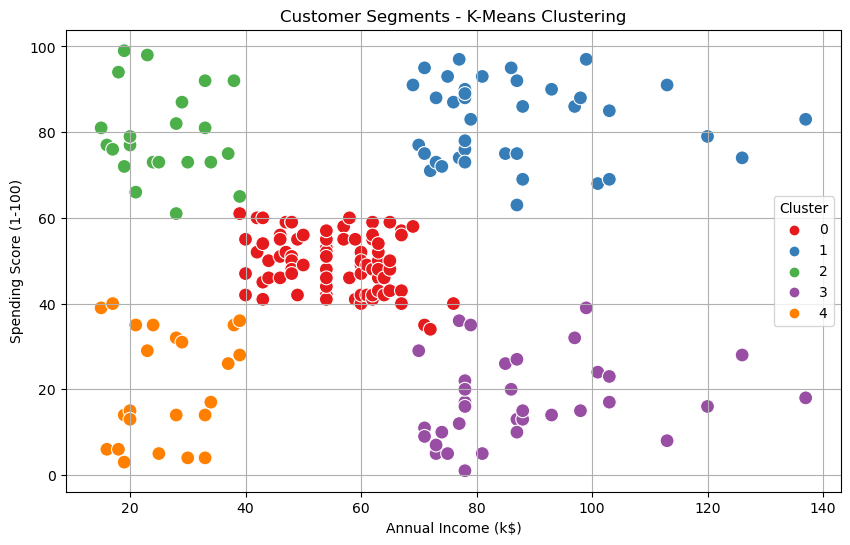

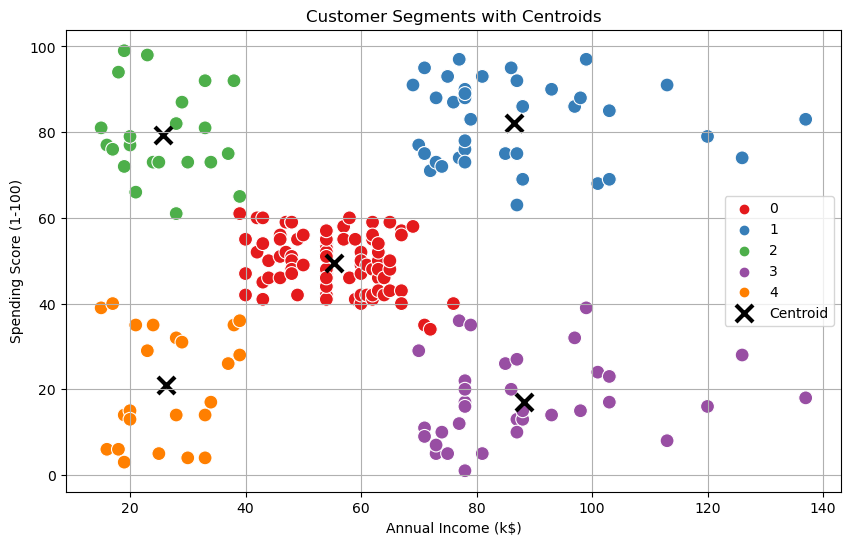


Segment Profiles:
        Annual Income (k$)        Spending Score (1-100)       
                      mean    std                   mean    std
Cluster                                                        
0                    55.30   8.99                  49.52   6.53
1                    86.54  16.31                  82.13   9.36
2                    25.73   7.57                  79.36  10.50
3                    88.20  16.40                  17.11   9.95
4                    26.30   7.89                  20.91  13.02


In [9]:
    #2D Scatter Plot of Clusters
import matplotlib.pyplot as plt
import seaborn as sns
# Plot Income vs Score, colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1',
    s=100
)
plt.title('Customer Segments - K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

    #Add Cluster Centroids
# Get cluster centers (in scaled space)
centers_scaled = kmeans_opt.cluster_centers_
# Transform centroids back to original scale
centers_original = scaler.inverse_transform(centers_scaled)
# Plot with centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1',
    s=100
)
# Plot centroids
plt.scatter(
    centers_original[:, 0],  # Original Income
    centers_original[:, 1],  # Original Score
    s=150, c='black', marker='x', linewidth=3, label='Centroid'
)

plt.title('Customer Segments with Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

    #Profile Table (Summary)
# Create a nice summary table
summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].agg(['mean', 'std'])
print("\nSegment Profiles:")
print(summary.round(2))